In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split


import warnings


In [26]:
#reading the csv file
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
#Preparing for X and Y;
#taking maths score as Y and will be considered as a output score

#dropping math score
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [28]:
y = df['math score']

In [39]:
#Create Column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns


In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [41]:
X = preprocessor.fit_transform(X)

In [42]:
#separate train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#Create an evaluate function to give all metrics after model training

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance of Training set")
    print("-Root Mean Squared Error : {:.4f} ", model_train_rmse)
    print("-Mean Absolute Error : {:.4f} ", model_train_mae)
    print("-R2_score : {:.4f} ", model_train_r2)
    print ("-----------------------------------")

    print("Model performance for test set")
    print("-Root Mean Squared Error : {:.4f} ", model_test_rmse)
    print("-Mean Absolute Error : {:.4f} ", model_test_mae)
    print("-R2_score : {:.4f} ", model_test_r2)

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance of Training set
-Root Mean Squared Error : {:.4f}  5.323050852720514
-Mean Absolute Error : {:.4f}  4.266711846071957
-R2_score : {:.4f}  0.8743172040139593
-----------------------------------
Model performance for test set
-Root Mean Squared Error : {:.4f}  5.393993869732844
-Mean Absolute Error : {:.4f}  4.214763142474852
-R2_score : {:.4f}  0.8804332983749564


Lasso
Model performance of Training set
-Root Mean Squared Error : {:.4f}  6.593815587795566
-Mean Absolute Error : {:.4f}  5.206302661246526
-R2_score : {:.4f}  0.8071462015863456
-----------------------------------
Model performance for test set
-Root Mean Squared Error : {:.4f}  6.519694535667419
-Mean Absolute Error : {:.4f}  5.157881810347763
-R2_score : {:.4f}  0.8253197323627853


Ridge
Model performance of Training set
-Root Mean Squared Error : {:.4f}  5.323324922741654
-Mean Absolute Error : {:.4f}  4.264987823725983
-R2_score : {:.4f}  0.8743042615212909
-------------------------

Result

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by='R2_Score', ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852602
6,AdaBoost Regressor,0.847417
1,Lasso,0.825320
3,KNeighbors Regressor,0.783497
4,Decision Tree,0.758957


Linear Regression

In [46]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 88.04


Plot y_pred and y_test

<Axes: xlabel='math score', ylabel='Predicted'>

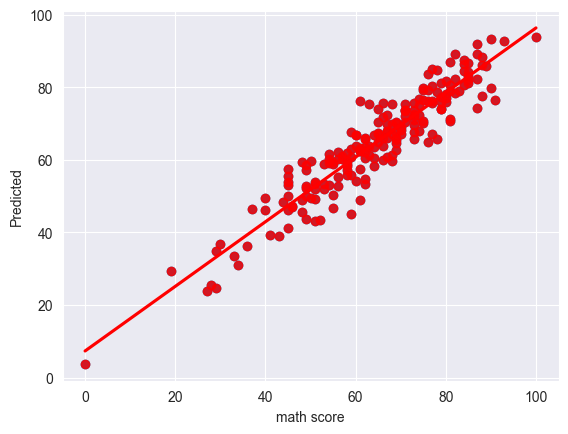

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

Difference between predicted value and actual value

In [50]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
